In [1]:
## Dingyi Kang
## A20308046
## Assignment3 - problem 1

import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# download and load the data into np array
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()
# normalize the pixel data (to make the value between 0 and 1)
train_x = train_images / 255.0
test_x = test_images / 255.0
train_x.shape

170498071/170498071 [==============================] - 4s 0us/step


(50000, 32, 32, 3)

In [3]:
def buildCNNModel(batchSize, optimizerStr, learningRate):
  cnn_model = tf.keras.models.Sequential()
  #layer 1
  cnn_model.add(tf.keras.layers.Conv2D(6, (5, 5), strides=(1, 1),  activation='relu', input_shape=(32,32,3)))
  #layer 2
  cnn_model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
  #layer 3
  cnn_model.add(tf.keras.layers.Conv2D(16, (5, 5), strides=(1, 1),  activation='relu'))
  #layer 4
  cnn_model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
  #layer 5
  cnn_model.add(tf.keras.layers.Conv2D(120, (5, 5), strides=(1, 1), activation='relu'))
  # you need flatten to make the extracted features from above  inputs for the model
  cnn_model.add(tf.keras.layers.Flatten())
  #layer 6
  cnn_model.add(tf.keras.layers.Dense(84))
  cnn_model.add(tf.keras.layers.Activation('relu'))
  #output layer
  cnn_model.add(tf.keras.layers.Dense(10))
  cnn_model.add(tf.keras.layers.Activation('softmax'))

  #compile the model with certain configuration of loss function, optimizer and its learning rate, and result metrics
  if optimizerStr == 'Adam':
    optimizer = keras.optimizers.Adam(learning_rate=learningRate)
  elif optimizerStr == 'SGD':
    optimizer = keras.optimizers.SGD(learning_rate=learningRate)
  elif optimizerStr == 'RMSProp':
    optimizer = keras.optimizers.RMSprop(learning_rate=learningRate)
  elif optimizerStr == 'Adadelta':
    optimizer = keras.optimizers.Adadelta(learning_rate=learningRate)
  elif optimizerStr == 'Adagrad':
    optimizer = keras.optimizers.Adagrad(learning_rate=learningRate)
  elif optimizerStr == 'Adamax':
    optimizer = keras.optimizers.Adamax(learning_rate=learningRate)
  elif optimizerStr == 'Nadam':
    optimizer = keras.optimizers.Nadam(learning_rate=learningRate)
  elif optimizerStr == 'Ftrl':
    optimizer = keras.optimizers.Ftrl(learning_rate=learningRate)
    
  cnn_model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  cnn_model.summary()

  # Train the model
  cnn_model.fit(
      train_x,
      train_labels, 
      batch_size=batchSize,
      epochs=25)
  # test the model performance
  score = cnn_model.evaluate(test_x, test_labels)
  print('Test loss:', score[0])
  print('Test accuracy:', score[1])

  # return the accuracy score
  return score[1]

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         456       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 120)         48120     
                                                                 
 flatten (Flatten)           (None, 120)               0

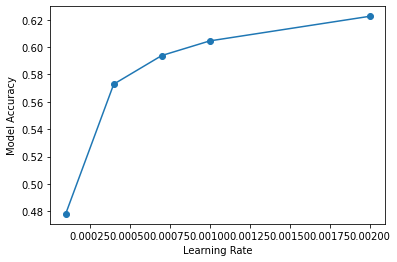

In [4]:
# 1. we can first explore the influence of learning rate on the model performance
# below is the learning rate we try at the first
learningRatesArr = [0.0001, 0.0004, 0.0007, 0.001, 0.002]
accuracyArr = []
for i in range(len(learningRatesArr)):
  a = buildCNNModel(batchSize=512, optimizerStr='Adam', learningRate=learningRatesArr[i])
  accuracyArr.append(a)

plt.xlabel("Learning Rate")
plt.ylabel('Model Accuracy')
plt.scatter(learningRatesArr, accuracyArr)
plt.plot(learningRatesArr, accuracyArr)

# As we can see from the graph, the model with learnign rate of 0.002 did the best with an accuracy of 0.6225
# Hence, we will further explore this area

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 28, 28, 6)         456       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 14, 14, 6)        0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 5, 5, 16)         0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 1, 1, 120)         48120     
                                                                 
 flatten_5 (Flatten)         (None, 120)              

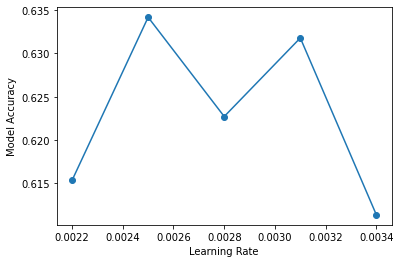

In [5]:
learningRatesArr = [0.0022, 0.0025, 0.0028, 0.0031, 0.0034]
accuracyArr = []
for i in range(len(learningRatesArr)):
  a = buildCNNModel(batchSize=512, optimizerStr='Adam', learningRate=learningRatesArr[i])
  accuracyArr.append(a)

plt.xlabel("Learning Rate")
plt.ylabel('Model Accuracy')
plt.scatter(learningRatesArr, accuracyArr)
plt.plot(learningRatesArr, accuracyArr)

# From the graph above, we can see the model with learnign rate of 0.0025 did the best with an accuracy of 0.63420

# Answer to question 1: in summary, we can say the effect of learning rate on the training process is not linear. It gives the model best performance around 0.0028. And the model performed best with the learning rate of 0.0025 at an accuracy of 0.63420

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 28, 28, 6)         456       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 14, 14, 6)        0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 5, 5, 16)         0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 1, 1, 120)         48120     
                                                                 
 flatten_10 (Flatten)        (None, 120)             

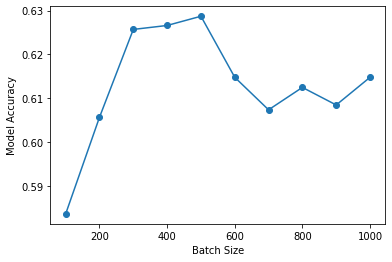

In [6]:
# 2. we can explore the influence of batch size on the model performance
# below is the batch sizes we try
batchSizesArr = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
accuracyArr = []
for i in range(len(batchSizesArr)):
  a = buildCNNModel(batchSize=batchSizesArr[i], optimizerStr='Adam', learningRate=0.0025)
  accuracyArr.append(a)
  
plt.xlabel("Batch Size")
plt.ylabel('Model Accuracy')
plt.scatter(batchSizesArr, accuracyArr)
plt.plot(batchSizesArr, accuracyArr)

# Answer to question 2: in summary, we can say the effect of batch size on the training process is not linear. It gives the model best performance around value of 400. And the model performed best with the batch size of 500 at an accuracy of 0.62870

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_60 (Conv2D)          (None, 28, 28, 6)         456       
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 14, 14, 6)        0         
 g2D)                                                            
                                                                 
 conv2d_61 (Conv2D)          (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_41 (MaxPoolin  (None, 5, 5, 16)         0         
 g2D)                                                            
                                                                 
 conv2d_62 (Conv2D)          (None, 1, 1, 120)         48120     
                                                                 
 flatten_20 (Flatten)        (None, 120)             

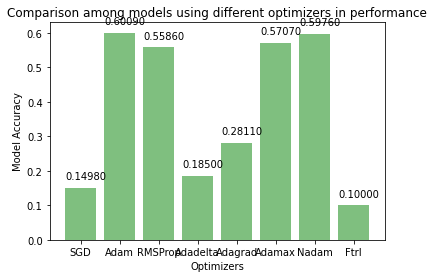

In [7]:
# 3. we explore the effect of the hypermeter optimizer on the training process

#we will try all availabel optimizers in keras
optimizers = ['SGD', 'Adam', 'RMSProp', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl']
accuracyArr = []
for i in range(len(optimizers)):
  a = buildCNNModel(batchSize=600, optimizerStr=optimizers[i], learningRate=0.0013)
  accuracyArr.append(a)
  
x = list(optimizers)
bars = plt.bar(x, accuracyArr, width=0.8, color='g', alpha=0.5, align='center')
plt.xlabel("Optimizers")
plt.ylabel('Model Accuracy')
plt.title("Comparison among models using different optimizers in performance")
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + 0.025, "{:.5f}".format(yval))



# Answer to question 3: 
# We try the hyperparameter of optimizer to test their influence on the accuracy of the model on testing data
# From the bar graph, we can see Adam, RMSProp, Adamax, and Nadam give models much better performance than SGD, Adadelta, Adagrad, and Ftrl.
# The performance of models using Adam, RMSProp, Adamax, and Nadam optimizers are close. Among them, the model using Adam gives the best performance with an accuracy of 0.60090

In [4]:
# 4. build and test the equivalent feed forward network

model = tf.keras.models.Sequential()
# first convert each input which is a 3d matrix into a vector
model.add(tf.keras.layers.Flatten(input_shape=(32,32,3)))
#layer 1
model.add(tf.keras.layers.Dense(6))
model.add(tf.keras.layers.Activation('relu'))
#layer 2
model.add(tf.keras.layers.Dense(16))
model.add(tf.keras.layers.Activation('relu'))
#layer 3
model.add(tf.keras.layers.Dense(120))
model.add(tf.keras.layers.Activation('relu'))
#layer 4
model.add(tf.keras.layers.Dense(84))
model.add(tf.keras.layers.Activation('relu'))
#output layer
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Activation('softmax'))

#compile the model with certain configuration of loss function, optimizer and its learning rate, and result metrics
model.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.Adam(), metrics=['accuracy'])
model.summary()

# Train the model
model.fit(
    train_x,
    train_labels, 
    batch_size=500,
    epochs=25)
# test the model performance
score = model.evaluate(test_x, test_labels)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_5 (Dense)             (None, 6)                 18438     
                                                                 
 activation_5 (Activation)   (None, 6)                 0         
                                                                 
 dense_6 (Dense)             (None, 16)                112       
                                                                 
 activation_6 (Activation)   (None, 16)                0         
                                                                 
 dense_7 (Dense)             (None, 120)               2040      
                                                                 
 activation_7 (Activation)   (None, 120)              

# Answer to question 4: 

#a. from the console, we can see the feed forward model didn't perform well in testing dataset. It only had an accuracy of 0.32890

# b. Feed forward network has more parameters than LeNet CNN in the first layer while LeNet CNN has more parameters than feed forward network in the middle layer, and they have same number of parameters in the last two layers. Specifically, in feed forward network, there are 18438 parameters in the frist layer, 112 parameters in the second layer, 2040 parameters in the third layer, 10164 parameters in the fourth layer, and 850 parameters in the output layer. In contrast, in LeNet CNN, there are only 456 parameters in the frist layer, 2416 parameters in the third layer, 48120 parameters in the fifth layer, 10164 parameters in the sixth layer, and 850 parameters in the output layer.

# I don't think the huge amount of parameters in the first layer of the feed forward network is worthy. The huge amount of the parameters is due to the big size of the input. Actually, not all pixeles in the input image contains useful information and more importantly representing them in a vector loses their spatial relationship between the pixels. As we can see, there are less parameters in middle layer in the feed forward model, which indicates this model extract less features from the input than LeNet CNN. Hence, I think using so many parameters to learn so big inputs in feed forward model is not only unworthy but also not harmful. Instead, we should more efficiently extract features from input images using either CNN or transfer.
